In [14]:
import numpy as np
from libsvm.python.svmutil import *
import matplotlib.pyplot as plt

from IPython.display import clear_output

In [15]:
# Read in the training and testing data
y_train, x_train = svm_read_problem('ncRNA_s.train.txt')
y_test, x_test = svm_read_problem('ncRNA_s.test.txt')

In [16]:
# Default constants
CV_SIZE = 1000
N_FOLD = 5
FOLD_SIZE = 200

# Problem 1

In [17]:
tunning_param_list = [2**p for p in range(-4, 9)]

tunning_param_list

[0.015625,
 0.03125,
 0.0625,
 0.125,
 0.25,
 0.5,
 1,
 2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096]

In [18]:
def svm_accuracy(y_train, x_train, y_test, x_test, c=1, t=0, g=None):
    
    gamma_arg = ''
    if t == 2 and g is not None:
        gamma_arg = f'-g {g}'
    
    # Train SVM on the training set with different c values
    model = svm_train(y_train, x_train, f'-c {c} -t {t} {gamma_arg}') 
    
    # Test the model with testing set
    _, accuracy, _ = svm_predict(y_test, x_test, model, options='-q')
    
    return accuracy[0]

In [19]:
history = []

for c in tunning_param_list:
    
    accuracy = svm_accuracy(y_train, x_train, y_test, x_test, c=c)
    
    history.append(accuracy)

history

[66.43356643356644,
 66.43356643356644,
 66.43356643356644,
 66.43356643356644,
 66.43356643356644,
 77.82217782217782,
 92.5074925074925,
 94.00599400599401,
 93.7062937062937,
 93.8061938061938,
 93.8061938061938,
 93.8061938061938,
 93.8061938061938,
 93.8061938061938,
 93.8061938061938,
 93.8061938061938,
 93.7062937062937,
 93.7062937062937,
 93.7062937062937]

The test accuracy increased significantly from around 70% to 94%, as we increase the parameter c from values smaller than 1 to values that are greater than 1.

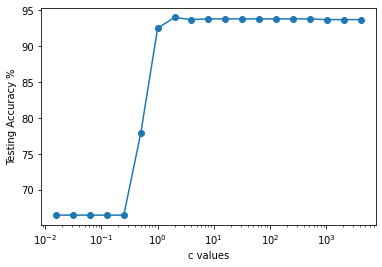

In [20]:
plt.plot(tunning_param_list, history, 'o-')
plt.xscale('log')
plt.xlabel('c values')
plt.ylabel('Testing Accuracy %')
plt.show()

# Problem 2

## Part 1

In [21]:
# Randomly select 1000 samples for cross-validation training
np.random.seed(1234)
y_size = len(y_train)
order = np.random.choice(range(y_size), size=CV_SIZE, replace=False)

y_cv = [[] for f in range(N_FOLD)]
x_cv = [[] for f in range(N_FOLD)]

i = 0

# Construct 5 subset for 5-fold cross-validation
for index in order:
    
    fold = i // FOLD_SIZE
    
    y_cv[fold].append(y_train[index])
    x_cv[fold].append(x_train[index])

    i += 1

In [22]:
# Initialize an accuracy matrix
matrix_dim = len(tunning_param_list)
accuracy_matrix = np.zeros((matrix_dim, matrix_dim))

accuracy_matrix.shape

(19, 19)

In [23]:
best_c = 0
best_g = 0
best_cv_accuracy = 0

for i in range(matrix_dim):
    
    for j in range(matrix_dim):

        fold_index = list(range(N_FOLD))

        accuracy = 0

        for index in range(N_FOLD):

            fold_index.remove(index)

            # Construct training set
            y_train_folds = [y_cv[i] for i in fold_index]
            y_cv_train = [sample for fold in y_train_folds for sample in fold]

            x_train_folds = [x_cv[i] for i in fold_index]
            x_cv_train = [sample for fold in x_train_folds for sample in fold]

            # Construct validation set
            y_cv_valid = y_cv[index]
            x_cv_valid = x_cv[index]

            # Restore fold_index
            fold_index = list(range(N_FOLD))

            # Evaluate the model for a given pair of c and gamma
            c = tunning_param_list[i]
            g = tunning_param_list[j]
            accuracy += svm_accuracy(y_cv_train, x_cv_train, y_cv_valid, x_cv_valid, c=c, t=2, g=g)
            
        accuracy = accuracy / N_FOLD
        
        # Log the best parameters so far
        if accuracy > best_cv_accuracy:
            best_cv_accuracy = accuracy
            best_c = c
            best_g = g
        
        # Update the accuracy_matrix
        clear_output(wait=True)
        accuracy_matrix[i][j] = accuracy
        print(accuracy_matrix)
        print()
        print(f'Best c = {best_c}; Best gamma = {best_g}')

[[68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4
  68.4 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4
  68.4 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4
  68.4 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4
  68.4 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 68.4 69.9 72.8 72.8 71.3 69.2
  68.4 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.4 68.5 68.8 70.2 77.4 81.3 80.7 78.7 75.4 72.6
  69.5 68.4 68.4 68.4 68.4]
 [68.4 68.4 68.4 68.4 68.6 69.2 79.9 90.3 90.  89.  87.2 84.2 81.  76.1
  72.3 69.5 68.3 68.3 68.3]
 [68.4 68.4 68.4 68.6 69.9 85.9 93.3 93.1 92.1 91.1 89.9 87.1 84.  79.1
  73.4 70.1 68.5 68.3 68.3]
 [68.4 68.4 68.6 70.2 88.5 93.6 94.  93.3 92.7 91.8 90.2 86.9 84.3 78.6
  73.3 70.1 68.5 68.3 68.3]
 [68.4 68.5 70.4 89.4 94.  94.4 93.9 93.8 93.2 91.3 90.1 87.  84.  78.6
  73.3 70.1 68.5 68.3 68.3]


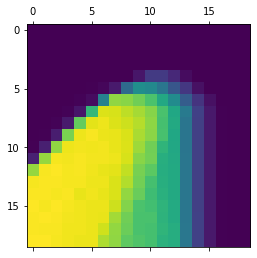

In [24]:
plt.matshow(accuracy_matrix)
plt.show()

## Part 2

The accuracy we can achieve by tunning parameters from cross-validation is:

In [25]:
# Find the accuracy using the best c and gamma
accuracy = svm_accuracy(y_train, x_train, y_test, x_test, c=best_c, t=2, g=best_g)

accuracy

93.9060939060939